In [66]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [108]:
with open("pickle/0705_docs", "rb") as d:
    top_emails = pickle.load(d)
key = 0 # keys: 0, 1, 3, 20, 51
ids = []
for email in top_emails[key]:
    ids.append(email[0])
df = pd.read_csv('~/../data/princeton_emails/corpus_v1.0.csv', usecols=[0, 1, 2, 3, 6, 18], low_memory=False).dropna(subset=['body_text']).reset_index(drop=True)
filtered = df.loc[df['uid_email'].isin(ids)]
# not_dem = df.loc[(df['uid_email'].isin(ids)) & (df['party_affiliation'] != "Democratic Party")]
# not_dem

In [111]:
filtered

,from_name,from_address,subject,body_text,party_affiliation,uid_email
775,When Democrats Turn Out,info@whendemocratsturnout.com,Trump is leaving schools on their own to reope...,"When Democrats Turn Out\nHi Alex,\nDonald Trum...",Democratic Party,065ace5c34a9ec44e3ca7dd2ef90db2c
807,When Democrats Turn Out,info@whendemocratsturnout.com,Warren: Out of touch DeVos is a threat to publ...,"When Democrats Turn Out\nAlex,\nIn the midst o...",Democratic Party,69bb547df08aed93accc0a2cb5c2a75d
1027,When Democrats Turn Out,info@whendemocratsturnout.com,Demand a National Mask Mandate NOW,"When Democrats Turn Out\nAlex,\nThe Trump admi...",Democratic Party,84f3354f52568f81b47603703ebfe606
1095,When Democrats Turn Out,info@whendemocratsturnout.com,We need a National Mask Mandate NOW,"When Democrats Turn Out\nAlex,\nThe Trump admi...",Democratic Party,b38ea2fde93e44631bb007cd13697565
1357,When Democrats Turn Out,info@whendemocratsturnout.com,Republican Rep. Gohmert refused to wear mask -...,"When Democrats Turn Out\nAlex,\nWhen the COVID...",Democratic Party,5e6e227efecd16e2c3adb25c1d65a44a
...,...,...,...,...,...,...
316429,"Celia Israel, TX HDCC Chair",info@email.texashdcc.com,Update on the Coronavirus,"Checking in with you\nAlex,\nAs the Coronaviru...",Democratic Party,205516584ca3d0d7fe488eb2e4fec038
316600,Senate Republican Campaign Committee,info@srcc.org,REMINDER: Legislative Republicans are calling ...,Meeting Link:\n[[URL REDACTED]]\nCall-in Numbe...,Republican Party,db8dad9f41c6b717124e847f99db1833
316613,Josalun Hasz,info@srcc.org,Brad Hawkins: Hydropower & Forest Health Advoc...,Our featured candidate highlight this is week ...,Republican Party,a4dd7716bb8d3a445b37d3f0fc9bd81a
316671,Don Blankenship,info@donblankenship.com,West Virginia Refugees,"Since 1950, politicians have caused 700,000 We...",Constitution Party,4388d2d5599655b8c78f5485750f0095


In [109]:
grouped = filtered.groupby(['party_affiliation'], dropna=False).count()
grouped

,from_name,from_address,subject,body_text,uid_email
party_affiliation,,,,,
Constitution Party,1,1,1,1,1
Democratic Party,1614,1614,1614,1614,1614
Green Party,4,4,4,4,4
Independence Party,29,29,29,29,29
Independent,8,8,8,8,8
Libertarian Party,16,16,16,16,16
Nonpartisan,3,3,3,3,3
Republican Party,655,655,655,655,655
Working Families Party,3,3,3,3,3


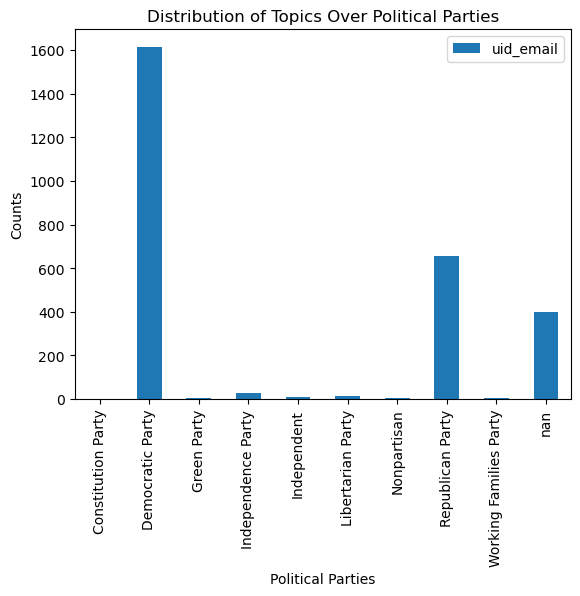

In [110]:
grouped.plot(y="uid_email", kind='bar')

# Set the labels and title
plt.xlabel('Political Parties')
plt.ylabel('Counts')
plt.title('Distribution of Topics Over Political Parties')

# Display the plot
plt.show()

In [98]:
print(filtered.at[316613, 'body_text'])

Our featured candidate highlight this is week is Senator Brad Hawkins, who has been serving the people of the 12th District since 2013. This includes Douglas and Chelan Counties, as well as parts of Grant and Okanogan Counties.
Friends –
Our featured candidate highlight this is week is Senator Brad Hawkins, who has been serving the people of the 12th District since 2013. This includes Douglas and Chelan Counties, as well as parts of Grant and Okanogan Counties.
Senator Hawkins grew up in the Wenatchee Valley and received his K-12 education in the Wenatchee School District. After graduating magna cum laude from Central Washington University, he completed his Master’s in Public Administration at George Washington University in Washington, D.C. and returned to the Wenatchee Valley after graduation. He and his wife, Shawna, live in East Wenatchee with their two young children.
Brad has been active in his community, serving on the North Central Educational Service District Board of Director